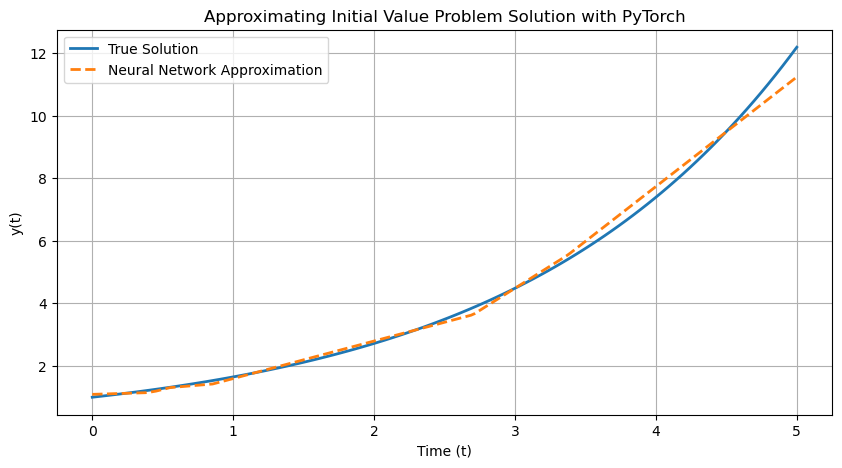

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
t = np.linspace(0, 5, 100)  # Time points from 0 to 5
y = np.exp(0.5 * t)  # True solution of dy/dt = 0.5y

# Convert NumPy arrays to PyTorch tensors
t_tensor = torch.tensor(t, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a simple feedforward neural network
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Create an instance of the neural network
model = MyNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
for epoch in range(1000):
    # Forward pass
    outputs = model(t_tensor)
    
    # Compute the loss
    loss = criterion(outputs, y_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the model to predict the solution
t_test = np.linspace(0, 5, 200)
t_test_tensor = torch.tensor(t_test, dtype=torch.float32).view(-1, 1)
y_pred = model(t_test_tensor).detach().numpy()

# Plot the true solution and the neural network's approximation
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='True Solution', linewidth=2)
plt.plot(t_test, y_pred, label='Neural Network Approximation', linestyle='dashed', linewidth=2)
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Approximating Initial Value Problem Solution with PyTorch')
plt.grid(True)
plt.show()
